#### module

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

#### hyper-parameters

In [2]:
num_data = 1000
num_epoch = 10000
input_size = 1
output_size = 1
learning_rate = 0.0002

#### dataset

In [3]:
x = init.uniform_(torch.Tensor(num_data, input_size), -15, 15)
y = (x**2) + 3
noise = init.normal_(torch.FloatTensor(num_data, output_size), std=1)
y_noise = y + noise

#### model

활성화함수 - 비선형성이 생기도록함

In [4]:
model = nn.Sequential(
        nn.Linear(1, 6), 
        nn.ReLU(),
        nn.Linear(6, 10), 
        nn.ReLU(),
        nn.Linear(10, 6),
        nn.ReLU(),
        nn.Linear(6, 1),
    )

#### loss

In [5]:
loss_func = nn.L1Loss()

#### optimizer

In [6]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

#### train

In [7]:
loss_array = []

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

#### plot

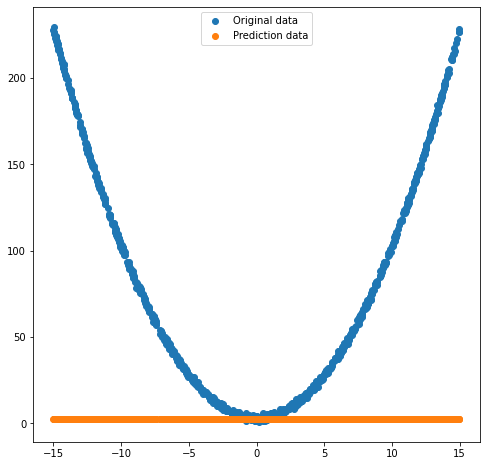

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(x.detach().numpy(),y_noise,label="Original data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Prediction data")
plt.legend()
plt.show()

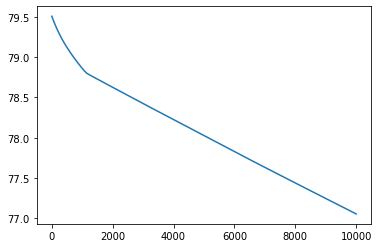

In [9]:
plt.plot(loss_array)
plt.show()